In [4]:
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import kruskal
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('C:/Users/javis/Downloads/Telegram Desktop/Pokemon_clusterizado.csv')

In [3]:
df

,name,type1,type2,generation,is_legendary,against_bug,against_dark,against_dragon,against_electric,against_fairy,...,sp_defense,speed,Porcentaje_attack,Porcentaje_defense,Porcentaje_sp_attack,Porcentaje_sp_defense,Porcentaje_speed,Porcentaje_hp,K-means_8,gmm_5
0,Bulbasaur,grass,poison,1,0,1.00,1.0,1.0,0.5,0.5,...,65,45,0.154088,0.154088,0.204403,0.204403,0.141509,0.141509,5,1
1,Ivysaur,grass,poison,1,0,1.00,1.0,1.0,0.5,0.5,...,80,60,0.153086,0.155556,0.197531,0.197531,0.148148,0.148148,5,4
2,Venusaur,grass,poison,1,0,1.00,1.0,1.0,0.5,0.5,...,120,80,0.160000,0.196800,0.195200,0.192000,0.128000,0.128000,5,4
3,Charmander,fire,Sin tipo,1,0,0.50,1.0,1.0,1.0,0.5,...,50,65,0.168285,0.139159,0.194175,0.161812,0.210356,0.126214,7,1
4,Charmeleon,fire,Sin tipo,1,0,0.50,1.0,1.0,1.0,0.5,...,65,80,0.158025,0.143210,0.197531,0.160494,0.197531,0.143210,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,steel,flying,7,1,0.25,1.0,0.5,2.0,0.5,...,101,61,0.177193,0.180702,0.187719,0.177193,0.107018,0.170175,6,2
797,Kartana,grass,steel,7,1,1.00,1.0,0.5,0.5,0.5,...,31,109,0.317544,0.229825,0.103509,0.054386,0.191228,0.103509,6,2
798,Guzzlord,dark,dragon,7,1,2.00,0.5,2.0,0.5,4.0,...,53,43,0.177193,0.092982,0.170175,0.092982,0.075439,0.391228,0,2
799,Necrozma,psychic,Sin tipo,7,1,2.00,2.0,1.0,1.0,1.0,...,89,79,0.178333,0.168333,0.211667,0.148333,0.131667,0.161667,6,2


In [5]:
escalada = pd.read_csv('C:/Users/javis/Downloads/Data_escala.csv')
escalada

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,sp_attack,sp_defense,speed,Porcentaje_attack,Porcentaje_defense,Porcentaje_sp_attack,Porcentaje_sp_defense,Porcentaje_speed,Porcentaje_hp
0,0.200000,0.200000,0.50,0.125,0.066667,0.125,0.466667,0.466667,0.250,0.000000,...,0.173228,0.298913,0.214286,0.228571,0.386169,0.321778,0.539347,0.374051,0.337372,0.248989
1,0.200000,0.200000,0.50,0.125,0.066667,0.125,0.466667,0.466667,0.250,0.000000,...,0.232283,0.380435,0.285714,0.314286,0.383463,0.325080,0.519270,0.356917,0.354390,0.261030
2,0.200000,0.200000,0.50,0.125,0.066667,0.125,0.466667,0.466667,0.250,0.000000,...,0.311024,0.608696,0.476190,0.428571,0.402136,0.417903,0.512460,0.343126,0.302741,0.224485
3,0.066667,0.200000,0.50,0.250,0.066667,0.250,0.066667,0.200000,0.250,0.066667,...,0.149606,0.271739,0.142857,0.342857,0.424513,0.288178,0.509464,0.267856,0.513857,0.221245
4,0.066667,0.200000,0.50,0.250,0.066667,0.250,0.066667,0.200000,0.250,0.066667,...,0.224409,0.380435,0.214286,0.428571,0.396801,0.297296,0.519270,0.264569,0.480980,0.252073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.000000,0.200000,0.25,0.500,0.066667,0.250,0.466667,0.066667,0.250,0.000000,...,0.377953,0.527174,0.385714,0.320000,0.448573,0.381673,0.490603,0.306206,0.248954,0.300984
797,0.200000,0.200000,0.25,0.125,0.066667,0.500,1.000000,0.200000,0.250,0.000000,...,0.228346,0.266304,0.052381,0.594286,0.827649,0.492227,0.244566,0.000000,0.464823,0.180062
798,0.466667,0.066667,1.00,0.125,1.000000,0.500,0.066667,0.200000,0.125,0.066667,...,0.874016,0.472826,0.157143,0.217143,0.448573,0.184256,0.439345,0.096236,0.168002,0.701937
799,0.466667,0.466667,0.50,0.250,0.200000,0.125,0.200000,0.200000,0.500,0.200000,...,0.377953,0.635870,0.328571,0.422857,0.451653,0.353838,0.560570,0.234248,0.312140,0.285551


In [6]:
tree = DecisionTreeClassifier()
tree.fit(escalada,df['gmm_5'])
importances=tree.feature_importances_
feature_importance= sorted(zip(importances, list(df.columns)), reverse=True)
data_tree = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(data_tree['importance'])
feature= list(data_tree['feature'])

In [7]:
data_tree

,importance,feature
0,0.241513,against_steel
1,0.227408,against_flying
2,0.154837,against_psychic
3,0.115882,against_fairy
4,0.074505,against_dark
5,0.060450,against_normal
6,0.032422,against_fire
7,0.012316,generation
8,0.011455,base_total
9,0.010818,sp_defense


<AxesSubplot:xlabel='feature'>

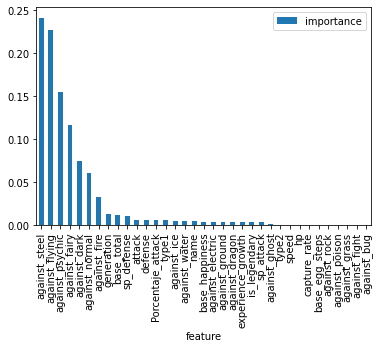

In [9]:
data_tree.plot.bar(x='feature',y='importance')

In [11]:
aux = df[['gmm_5']+list(data_tree['feature'])].groupby(['gmm_5']).mean()

In [12]:
ls_res = []
for feature in aux.columns[1:]:
    l = []
    for cl in df["gmm_5"].unique():
        l.append(df.loc[df["gmm_5"]==cl, feature].to_list())
    kr = kruskal(*l)
    ls_res.append((feature,kr.pvalue))

In [15]:
data_kruskal=pd.DataFrame(ls_res,columns=['Feature','p_value']).round(3)
data_kruskal

,Feature,p_value
0,against_flying,0.000
1,against_psychic,0.000
2,against_fairy,0.000
3,against_dark,0.000
4,against_normal,0.000
5,against_fire,0.000
6,generation,0.000
7,base_total,0.000
8,sp_defense,0.000
9,attack,0.000


In [17]:
variables_cambio=data_kruskal[data_kruskal['p_value']<.05]['Feature'].to_list()
for v in variables_cambio:
    print(v)
    mc = MultiComparison(df[v],df['gmm_5'])
    display(mc.tukeyhsd().summary())
    print('\n')

against_flying


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.3155,0.0,0.135,0.4959,True
0,2,0.0853,0.8621,-0.1516,0.3223,False
0,3,-0.2411,0.0124,-0.447,-0.0351,True
0,4,0.3778,0.0,0.2072,0.5484,True
1,2,-0.2301,0.0291,-0.4453,-0.015,True
1,3,-0.5565,-0.0,-0.737,-0.3761,True
1,4,0.0623,0.7354,-0.0765,0.2012,False
2,3,-0.3264,0.0017,-0.5633,-0.0895,True
2,4,0.2925,0.0011,0.0855,0.4994,True
3,4,0.6189,-0.0,0.4482,0.7895,True




against_psychic


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0751,0.6789,-0.0805,0.2307,False
0,2,-0.1678,0.1641,-0.3721,0.0365,False
0,3,-0.2031,0.0157,-0.3807,-0.0256,True
0,4,0.0399,0.9465,-0.1072,0.1871,False
1,2,-0.2429,0.0033,-0.4284,-0.0574,True
1,3,-0.2782,0.0,-0.4339,-0.1226,True
1,4,-0.0352,0.9296,-0.1549,0.0845,False
2,3,-0.0353,0.9898,-0.2396,0.169,False
2,4,0.2077,0.0131,0.0293,0.3862,True
3,4,0.2431,0.0001,0.0959,0.3902,True




against_fairy


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0173,0.9984,-0.1801,0.1455,False
0,2,0.1896,0.1094,-0.0241,0.4033,False
0,3,-0.1496,0.1801,-0.3353,0.0362,False
0,4,0.1852,0.0092,0.0313,0.3391,True
1,2,0.2069,0.0299,0.0129,0.4009,True
1,3,-0.1323,0.1727,-0.295,0.0305,False
1,4,0.2025,0.0001,0.0773,0.3278,True
2,3,-0.3392,0.0002,-0.5528,-0.1255,True
2,4,-0.0044,1.0,-0.191,0.1823,False
3,4,0.3348,0.0,0.1809,0.4887,True




against_dark


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0182,0.9958,-0.1511,0.1147,False
0,2,0.2734,0.0002,0.0989,0.4479,True
0,3,0.3259,0.0,0.1742,0.4776,True
0,4,-0.0542,0.7631,-0.1799,0.0715,False
1,2,0.2915,0.0,0.1331,0.45,True
1,3,0.3441,0.0,0.2112,0.477,True
1,4,-0.036,0.8713,-0.1383,0.0662,False
2,3,0.0525,0.9236,-0.122,0.227,False
2,4,-0.3276,0.0,-0.48,-0.1752,True
3,4,-0.3801,-0.0,-0.5058,-0.2544,True




against_normal


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0446,0.0263,0.0034,0.0859,True
0,2,-0.0877,0.0001,-0.1419,-0.0336,True
0,3,-0.6384,-0.0,-0.6855,-0.5913,True
0,4,0.0446,0.0156,0.0056,0.0836,True
1,2,-0.1324,0.0,-0.1815,-0.0832,True
1,3,-0.683,-0.0,-0.7243,-0.6418,True
1,4,0.0,1.0,-0.0317,0.0317,False
2,3,-0.5507,-0.0,-0.6048,-0.4965,True
2,4,0.1324,-0.0,0.0851,0.1797,True
3,4,0.683,-0.0,0.644,0.722,True




against_fire


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.7337,-0.0,0.5267,0.9406,True
0,2,0.5843,0.0,0.3126,0.856,True
0,3,0.7478,-0.0,0.5116,0.9839,True
0,4,0.7143,-0.0,0.5186,0.9101,True
1,2,-0.1494,0.4626,-0.3961,0.0974,False
1,3,0.0141,0.9997,-0.1929,0.2211,False
1,4,-0.0193,0.9974,-0.1786,0.1399,False
2,3,0.1635,0.4691,-0.1082,0.4352,False
2,4,0.13,0.5642,-0.1073,0.3674,False
3,4,-0.0334,0.9902,-0.2291,0.1623,False




generation


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.142,0.9694,-0.4696,0.7537,False
0,2,1.0846,0.0022,0.2815,1.8876,True
0,3,0.7321,0.0344,0.0341,1.4302,True
0,4,0.3908,0.3471,-0.1876,0.9692,False
1,2,0.9425,0.004,0.2133,1.6718,True
1,3,0.5901,0.0647,-0.0216,1.2018,False
1,4,0.2488,0.5985,-0.2218,0.7194,False
2,3,-0.3524,0.7515,-1.1555,0.4506,False
2,4,-0.6937,0.0543,-1.3953,0.0078,False
3,4,-0.3413,0.4892,-0.9197,0.2371,False




base_total


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-127.3917,-0.0,-151.856,-102.9274,True
0,2,195.0646,-0.0,162.9475,227.1817,True
0,3,20.1786,0.2786,-7.7384,48.0956,False
0,4,48.6644,0.0,25.5309,71.7979,True
1,2,322.4563,-0.0,293.2904,351.6222,True
1,3,147.5703,-0.0,123.1059,172.0346,True
1,4,176.0561,-0.0,157.2331,194.8791,True
2,3,-174.886,-0.0,-207.0031,-142.769,True
2,4,-146.4002,-0.0,-174.4592,-118.3412,True
3,4,28.4858,0.0071,5.3523,51.6194,True




sp_defense


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-22.3996,-0.0,-29.8818,-14.9174,True
0,2,30.1633,-0.0,20.3406,39.9861,True
0,3,5.5268,0.3921,-3.0114,14.065,False
0,4,8.1606,0.0144,1.0854,15.2358,True
1,2,52.5629,-0.0,43.6428,61.4831,True
1,3,27.9263,-0.0,20.4441,35.4086,True
1,4,30.5602,-0.0,24.8033,36.317,True
2,3,-24.6366,0.0,-34.4593,-14.8138,True
2,4,-22.0027,0.0,-30.5844,-13.4211,True
3,4,2.6338,0.8472,-4.4414,9.709,False




attack


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-22.0217,0.0,-30.6557,-13.3876,True
0,2,37.6665,-0.0,26.3317,49.0013,True
0,3,12.2857,0.0061,2.4332,22.1383,True
0,4,12.2551,0.0004,4.0908,20.4195,True
1,2,59.6882,-0.0,49.3948,69.9815,True
1,3,34.3074,-0.0,25.6734,42.9414,True
1,4,34.2768,-0.0,27.6337,40.9198,True
2,3,-25.3808,0.0,-36.7156,-14.0459,True
2,4,-25.4114,0.0,-35.314,-15.5087,True
3,4,-0.0306,1.0,-8.1949,8.1338,False




defense


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-29.5343,-0.0,-37.628,-21.4407,True
0,2,21.2962,0.0,10.6708,31.9216,True
0,3,20.2679,0.0,11.032,29.5037,True
0,4,-1.9981,0.9534,-9.6514,5.6553,False
1,2,50.8306,-0.0,41.1815,60.4796,True
1,3,49.8022,-0.0,41.7086,57.8958,True
1,4,27.5363,-0.0,21.309,33.7635,True
2,3,-1.0284,0.9989,-11.6538,9.597,False
2,4,-23.2943,0.0,-32.5772,-14.0115,True
3,4,-22.266,-0.0,-29.9193,-14.6126,True




Porcentaje_attack


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0004,1.0,-0.016,0.0167,False
0,2,0.005,0.9683,-0.0164,0.0265,False
0,3,0.0208,0.0199,0.0022,0.0395,True
0,4,0.009,0.5025,-0.0065,0.0245,False
1,2,0.0046,0.9665,-0.0148,0.0241,False
1,3,0.0204,0.006,0.0041,0.0368,True
1,4,0.0086,0.3336,-0.004,0.0212,False
2,3,0.0158,0.2616,-0.0057,0.0372,False
2,4,0.004,0.9781,-0.0148,0.0227,False
3,4,-0.0118,0.2258,-0.0273,0.0036,False




against_ice


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.6956,-0.0,0.4789,0.9123,True
0,2,0.7839,0.0,0.4994,1.0684,True
0,3,0.5045,0.0,0.2572,0.7517,True
0,4,0.8853,-0.0,0.6804,1.0902,True
1,2,0.0883,0.8834,-0.17,0.3467,False
1,3,-0.1911,0.1134,-0.4078,0.0256,False
1,4,0.1897,0.0165,0.023,0.3565,True
2,3,-0.2794,0.057,-0.5639,0.0051,False
2,4,0.1014,0.7983,-0.1471,0.35,False
3,4,0.3808,0.0,0.1759,0.5857,True




against_water


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.475,0.0,0.3003,0.6496,True
0,2,0.4189,0.0,0.1896,0.6481,True
0,3,1.0089,-0.0,0.8096,1.2082,True
0,4,0.4618,-0.0,0.2967,0.627,True
1,2,-0.0561,0.9478,-0.2643,0.1521,False
1,3,0.5339,-0.0,0.3593,0.7086,True
1,4,-0.0131,0.9989,-0.1475,0.1212,False
2,3,0.5901,0.0,0.3608,0.8194,True
2,4,0.043,0.977,-0.1573,0.2433,False
3,4,-0.5471,-0.0,-0.7122,-0.3819,True




base_happiness


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.4082,0.9996,-5.1437,5.96,False
0,2,-33.8787,-0.0,-41.1672,-26.5901,True
0,3,-5.6696,0.1042,-12.005,0.6658,False
0,4,-2.0375,0.8264,-7.2873,3.2123,False
1,2,-34.2869,-0.0,-40.9057,-27.6681,True
1,3,-6.0778,0.0237,-11.6297,-0.526,True
1,4,-2.4457,0.5202,-6.7173,1.8259,False
2,3,28.209,-0.0,20.9205,35.4976,True
2,4,31.8412,-0.0,25.4736,38.2088,True
3,4,3.6321,0.3227,-1.6177,8.882,False




against_electric


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.9912,-0.0,-1.1674,-0.8151,True
0,2,-0.9443,-0.0,-1.1755,-0.7131,True
0,3,-1.0848,-0.0,-1.2858,-0.8839,True
0,4,-1.0437,-0.0,-1.2102,-0.8772,True
1,2,0.0469,0.9734,-0.163,0.2569,False
1,3,-0.0936,0.5936,-0.2697,0.0825,False
1,4,-0.0524,0.8278,-0.1879,0.0831,False
2,3,-0.1405,0.4586,-0.3717,0.0907,False
2,4,-0.0994,0.6631,-0.3014,0.1026,False
3,4,0.0411,0.9617,-0.1254,0.2077,False




against_ground


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0643,0.9335,-0.2866,0.1581,False
0,2,-0.0494,0.9906,-0.3412,0.2425,False
0,3,0.6562,0.0,0.4026,0.9099,True
0,4,-0.1181,0.5394,-0.3283,0.0921,False
1,2,0.0149,0.9999,-0.2502,0.2799,False
1,3,0.7205,-0.0,0.4982,0.9428,True
1,4,-0.0538,0.9111,-0.2249,0.1172,False
2,3,0.7056,0.0,0.4138,0.9975,True
2,4,-0.0687,0.9478,-0.3237,0.1863,False
3,4,-0.7743,-0.0,-0.9846,-0.5641,True




against_dragon


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0546,0.6581,-0.1648,0.0557,False
0,2,0.1224,0.1422,-0.0224,0.2671,False
0,3,-0.1562,0.0064,-0.2821,-0.0304,True
0,4,0.0568,0.5698,-0.0475,0.161,False
1,2,0.1769,0.0023,0.0455,0.3084,True
1,3,-0.1017,0.0868,-0.2119,0.0086,False
1,4,0.1113,0.0032,0.0265,0.1962,True
2,3,-0.2786,0.0,-0.4234,-0.1339,True
2,4,-0.0656,0.6161,-0.192,0.0609,False
3,4,0.213,0.0,0.1088,0.3173,True




experience_growth


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-25198.6517,0.5999,-72940.5748,22543.2713,False
0,2,194684.6849,-0.0,132008.532,257360.8378,True
0,3,-38113.75,0.3113,-92593.5536,16366.0536,False
0,4,9200.2143,0.981,-35944.667,54345.0956,False
1,2,219883.3366,-0.0,162966.3588,276800.3144,True
1,3,-12915.0983,0.9471,-60657.0213,34826.8248,False
1,4,34398.866,0.0789,-2333.9875,71131.7196,False
2,3,-232798.4349,-0.0,-295474.5878,-170122.282,True
2,4,-185484.4706,-0.0,-240241.3099,-130727.6312,True
3,4,47313.9643,0.0346,2169.083,92458.8456,True




is_legendary


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0179,0.7637,-0.0593,0.0236,False
0,2,0.8939,-0.0,0.8395,0.9483,True
0,3,0.0089,0.9857,-0.0383,0.0562,False
0,4,-0.0079,0.9821,-0.047,0.0313,False
1,2,0.9118,-0.0,0.8624,0.9611,True
1,3,0.0268,0.3932,-0.0146,0.0682,False
1,4,0.01,0.9121,-0.0219,0.0419,False
2,3,-0.885,-0.0,-0.9394,-0.8306,True
2,4,-0.9018,-0.0,-0.9493,-0.8543,True
3,4,-0.0168,0.7676,-0.056,0.0224,False




sp_attack


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-25.5186,-0.0,-34.0569,-16.9802,True
0,2,41.1854,-0.0,29.9762,52.3946,True
0,3,-4.8036,0.6612,-14.5469,4.9398,False
0,4,7.7389,0.0676,-0.3349,15.8128,False
1,2,66.704,-0.0,56.5247,76.8832,True
1,3,20.715,0.0,12.1767,29.2533,True
1,4,33.2575,-0.0,26.6881,39.8269,True
2,3,-45.989,-0.0,-57.1982,-34.7797,True
2,4,-33.4465,-0.0,-43.2394,-23.6536,True
3,4,12.5425,0.0002,4.4686,20.6164,True




against_ghost


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.2011,0.0098,-0.3691,-0.0331,True
0,2,0.2114,0.0676,-0.0092,0.4319,False
0,3,0.3393,0.0,0.1476,0.531,True
0,4,-0.1579,0.0523,-0.3168,0.0009,False
1,2,0.4125,0.0,0.2122,0.6128,True
1,3,0.5404,-0.0,0.3724,0.7084,True
1,4,0.0432,0.8917,-0.0861,0.1724,False
2,3,0.1279,0.5072,-0.0927,0.3484,False
2,4,-0.3693,0.0,-0.562,-0.1766,True
3,4,-0.4972,-0.0,-0.6561,-0.3383,True




speed


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-9.3058,0.0158,-17.4462,-1.1654,True
0,2,35.3372,-0.0,24.6504,46.024,True
0,3,-7.6161,0.1656,-16.9053,1.6732,False
0,4,14.654,0.0,6.9565,22.3516,True
1,2,44.643,-0.0,34.9382,54.3478,True
1,3,1.6897,0.9797,-6.4507,9.8301,False
1,4,23.9598,-0.0,17.6966,30.2231,True
2,3,-42.9533,-0.0,-53.64,-32.2665,True
2,4,-20.6831,0.0,-30.0196,-11.3467,True
3,4,22.2701,-0.0,14.5726,29.9677,True




hp


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-18.6118,0.0,-25.8952,-11.3283,True
0,2,29.416,-0.0,19.8541,38.9778,True
0,3,-5.4821,0.3723,-13.7936,2.8293,False
0,4,7.8538,0.0162,0.9665,14.7411,True
1,2,48.0277,-0.0,39.3445,56.7109,True
1,3,13.1296,0.0,5.8461,20.4131,True
1,4,26.4656,-0.0,20.8616,32.0695,True
2,3,-34.8981,-0.0,-44.46,-25.3363,True
2,4,-21.5622,0.0,-29.9158,-13.2085,True
3,4,13.336,0.0,6.4487,20.2232,True




capture_rate


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,79.287,-0.0,60.8604,97.7136,True
0,2,-76.8351,-0.0,-101.0257,-52.6444,True
0,3,-12.3036,0.4979,-33.3307,8.7236,False
0,4,-30.7088,0.0,-48.133,-13.2846,True
1,2,-156.1221,-0.0,-178.0899,-134.1543,True
1,3,-91.5906,-0.0,-110.0172,-73.164,True
1,4,-109.9958,-0.0,-124.1733,-95.8183,True
2,3,64.5315,0.0,40.3409,88.7222,True
2,4,46.1263,0.0,24.9922,67.2604,True
3,4,-18.4052,0.0324,-35.8295,-0.981,True




base_egg_steps


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-647.8742,0.1522,-1424.5948,128.8463,False
0,2,21749.2437,-0.0,20729.5559,22768.9315,True
0,3,697.1429,0.2,-189.1973,1583.483,False
0,4,58.5143,0.9995,-675.9546,792.9832,False
1,2,22397.1179,-0.0,21471.127,23323.1088,True
1,3,1345.0171,0.0,568.2965,2121.7376,True
1,4,706.3885,0.0112,108.7762,1304.0009,True
2,3,-21052.1008,-0.0,-22071.7886,-20032.4131,True
2,4,-21690.7294,-0.0,-22581.5767,-20799.8821,True
3,4,-638.6286,0.1226,-1373.0975,95.8403,False




against_rock


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.1967,0.1012,-0.022,0.4154,False
0,2,0.1318,0.7186,-0.1553,0.4189,False
0,3,-0.1496,0.4732,-0.3991,0.1,False
0,4,0.2712,0.0033,0.0644,0.478,True
1,2,-0.0649,0.9607,-0.3256,0.1959,False
1,3,-0.3462,0.0002,-0.5649,-0.1275,True
1,4,0.0745,0.7453,-0.0938,0.2428,False
2,3,-0.2814,0.0579,-0.5685,0.0057,False
2,4,0.1394,0.5503,-0.1115,0.3902,False
3,4,0.4207,0.0,0.2139,0.6275,True




against_poison


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.2164,0.0011,0.0635,0.3693,True
0,2,-0.0659,0.8977,-0.2666,0.1348,False
0,3,-0.567,-0.0,-0.7414,-0.3925,True
0,4,0.2365,0.0001,0.0919,0.381,True
1,2,-0.2823,0.0002,-0.4646,-0.1001,True
1,3,-0.7834,-0.0,-0.9362,-0.6305,True
1,4,0.0201,0.9902,-0.0975,0.1377,False
2,3,-0.5011,0.0,-0.7017,-0.3004,True
2,4,0.3024,0.0,0.1271,0.4777,True
3,4,0.8035,-0.0,0.6589,0.948,True




against_grass


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-1.3681,-0.0,-1.5654,-1.1708,True
0,2,-1.3897,-0.0,-1.6487,-1.1307,True
0,3,-0.942,-0.0,-1.1671,-0.7168,True
0,4,-1.46,-0.0,-1.6466,-1.2734,True
1,2,-0.0216,0.9991,-0.2568,0.2136,False
1,3,0.4262,0.0,0.2289,0.6234,True
1,4,-0.0919,0.4628,-0.2437,0.0599,False
2,3,0.4477,0.0,0.1887,0.7067,True
2,4,-0.0703,0.915,-0.2966,0.156,False
3,4,-0.518,0.0,-0.7046,-0.3315,True




against_bug


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0272,0.9949,-0.1613,0.2157,False
0,2,0.0743,0.9242,-0.1732,0.3218,False
0,3,-0.2612,0.0084,-0.4763,-0.046,True
0,4,0.0636,0.8661,-0.1146,0.2419,False
1,2,0.0471,0.9789,-0.1776,0.2719,False
1,3,-0.2884,0.0003,-0.4769,-0.0998,True
1,4,0.0364,0.9593,-0.1086,0.1815,False
2,3,-0.3355,0.0021,-0.583,-0.088,True
2,4,-0.0107,0.9999,-0.2269,0.2055,False
3,4,0.3248,0.0,0.1465,0.5031,True
